#### AOS 575 - Orthogonal Least Square - Lecture, 9/29/2020
coded by Prof Libby Barnes (CSU) <br>
with additional updates/coding by Prof. Jennifer Kay (CU); last updated January 28, 2019 <br>
updated for UWisc 575 by Prof. Maroon <br>
Last updated: September 26, 2020

In [1]:
#import packages
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import xarray
import pandas as pd   ##pandas reads in .csv.
from scipy import stats, odr
import numpy.linalg as LA
from sklearn import datasets, linear_model

Make some synthetic data and plot it

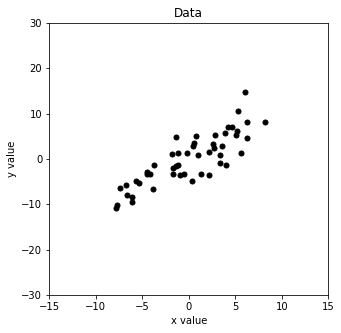

In [2]:
LW = 2
x = 5.*np.random.randn(50)             #50 randomly drawn numbers from normal distribution. 
                                       #Inflated by factor of 5 from standardized normal dist
y = x+5.+3.*np.random.randn(len(x))    
x = x - np.mean(x)                     #remove means
y = y - np.mean(y)

f=plt.figure(figsize=(5,5))
plt.plot(x,y,'ok',markersize = 5, label = 'DATA')
plt.ylabel('y value')
plt.xlabel('x value')
plt.xlim([-15,15])
plt.ylim([-30, 30])
plt.title('Data')
plt.show()

Least square fit. X independent, Y dependent:

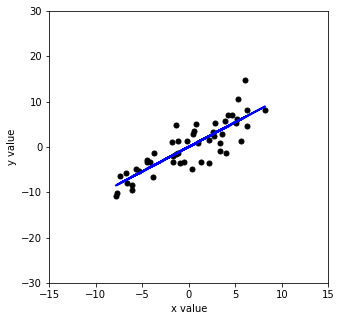

In [3]:
# LSQ - X VERSUS Y
slope_xy, intercept_xy, r_value, p_value, std_err = stats.linregress(x,y)

f=plt.figure(figsize=(5,5))
plt.plot(x,y,'ok',markersize = 5, label = 'DATA')
plt.plot(x,intercept_xy+x*slope_xy,'-',color = 'blue', label = 'LSQ: x vs y', linewidth = LW)
plt.ylabel('y value')
plt.xlabel('x value')
plt.xlim([-15,15])
plt.ylim([-30, 30])
plt.show()

Least square fit. Y independent, X dependent:

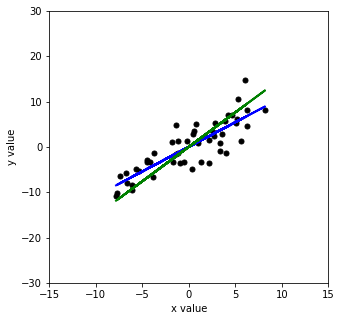

In [4]:
# LSQ - Y VERSUS X
slope_yx, intercept_yx, r_value, p_value, std_err = stats.linregress(y,x)

f=plt.figure(figsize=(5,5))
plt.plot(x,y,'ok',markersize = 5, label = 'DATA')
plt.plot(x,intercept_xy+x*slope_xy,'-',color = 'blue', label = 'LSQ: x vs y', linewidth = LW)
plt.ylabel('y value')
plt.xlabel('x value')
plt.xlim([-15,15])
plt.ylim([-30, 30])
plt.plot(x,(1./slope_yx)*x - intercept_yx/slope_yx,'-',color = 'green', label = 'LSQ: y vs x', linewidth = LW)
plt.show()

Orthogonal least squares fit

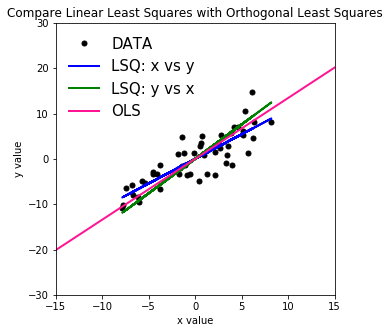

In [5]:
# OLS
C = np.cov([x,y], rowvar = 1)
LAM, E = LA.eig(C)

f=plt.figure(figsize=(5,5))
plt.title('Compare Linear Least Squares with Orthogonal Least Squares')

plt.plot(x,y,'ok',markersize = 5, label = 'DATA')
plt.plot(x,intercept_xy+x*slope_xy,'-',color = 'blue', label = 'LSQ: x vs y', linewidth = LW)
plt.plot(x,(1./slope_yx)*x - intercept_yx/slope_yx,'-',color = 'green', label = 'LSQ: y vs x', linewidth = LW)
plt.plot(np.array([-E[0][1],E[0][1]])*30.,np.array([-E[1][1],E[1][1]])*30.,'-', color = 'deeppink', linewidth = LW, label  = 'OLS')

plt.ylabel('y value')
plt.xlabel('x value')
plt.xlim([-15,15])
plt.ylim([-30, 30])
plt.legend(frameon = 0, loc = 'upper left', fontsize = 15)
plt.show()